In [161]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [162]:
titanic_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
titanic_df.info()
print("------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fa

In [164]:
p_per_t = pd.DataFrame(titanic_df.groupby('Ticket').count()['PassengerId'])
p_per_t.columns=['num']

In [165]:
# Fare process for training data
p_per_t = pd.DataFrame(titanic_df.groupby('Ticket').count()['PassengerId'])
p_per_t.columns=['num']

family_num = pd.DataFrame(titanic_df['SibSp']+titanic_df['Parch']+1)
family_num.columns = ['f_num']
titanic_family = pd.DataFrame(titanic_df['Ticket'])
titanic_family = titanic_family.join(family_num)
fn_per_t = pd.DataFrame(titanic_family.groupby(['Ticket']).max()['f_num'])
ticket_num = p_per_t.join(fn_per_t)
ticket_num['max_num']=ticket_num[['num','f_num']].max(axis=1)
max_num = pd.DataFrame(ticket_num.loc[titanic_family['Ticket']]['max_num']).reset_index(drop = True)
titanic_family = titanic_family.join(titanic_df['Fare'])
titanic_family = titanic_family.join(max_num)
avg_fare = pd.DataFrame(titanic_family.Fare/titanic_family.max_num)
avg_fare.columns = ['avg_fare']
titanic_family = titanic_family.join(avg_fare)
titanic_df = titanic_df.join(avg_fare)
titanic_df = titanic_df.join(titanic_family['f_num'])
titanic_df = titanic_df.join(titanic_family['max_num'])


In [166]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,avg_fare,f_num,max_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,1


In [167]:
#process test_data avg_fare

p_per_t = pd.DataFrame(test_df.groupby('Ticket').count()['PassengerId'])
p_per_t.columns=['num']

family_num = pd.DataFrame(test_df['SibSp']+test_df['Parch']+1)
family_num.columns = ['f_num']
test_family = pd.DataFrame(test_df['Ticket'])
test_family = test_family.join(family_num)
fn_per_t = pd.DataFrame(test_family.groupby(['Ticket']).max()['f_num'])
ticket_num = p_per_t.join(fn_per_t)
ticket_num['max_num']=ticket_num[['num','f_num']].max(axis=1)
max_num = pd.DataFrame(ticket_num.loc[test_family['Ticket']]['max_num']).reset_index(drop = True)
test_family = test_family.join(test_df['Fare'])
test_family = test_family.join(max_num)
avg_fare = pd.DataFrame(test_family.Fare/test_family.max_num)
avg_fare.columns = ['avg_fare']
test_family = test_family.join(avg_fare)
test_df = test_df.join(avg_fare)
test_df = test_df.join(test_family['f_num'])
test_df = test_df.join(test_family['max_num'])


In [168]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,avg_fare,f_num,max_num
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,7.829200,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3.500000,2,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,9.687500,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,8.662500,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,4.095833,3,3


In [169]:
#titanic_df = titanic_df.drop(['Name','Ticket','Cabin','Fare','f_num'],axis=1)
#test_df = test_df.drop(['Name','Ticket','Cabin','Fare','f_num'], axis=1)

titanic_df = titanic_df.drop(['Name','Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Name','Ticket','Cabin'], axis=1)

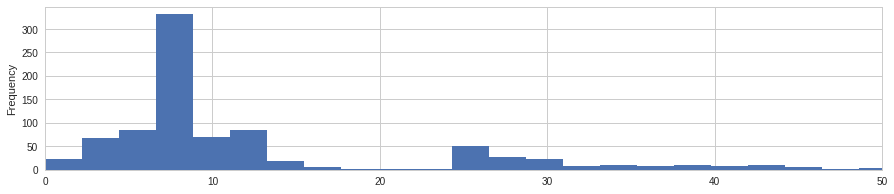

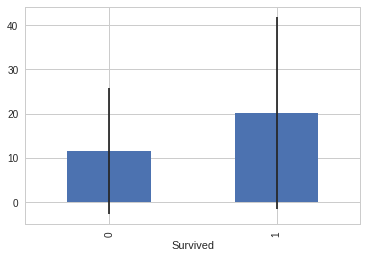

In [170]:
test_df["avg_fare"].fillna(test_df["avg_fare"].median(), inplace=True)


# convert from float to int
titanic_df['avg_fare'] = titanic_df['avg_fare'].astype(int)
test_df['avg_fare']    = test_df['avg_fare'].astype(int)

fare_not_survived = titanic_df["avg_fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["avg_fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['avg_fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

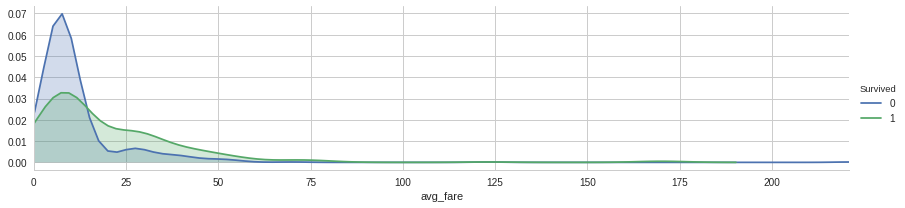

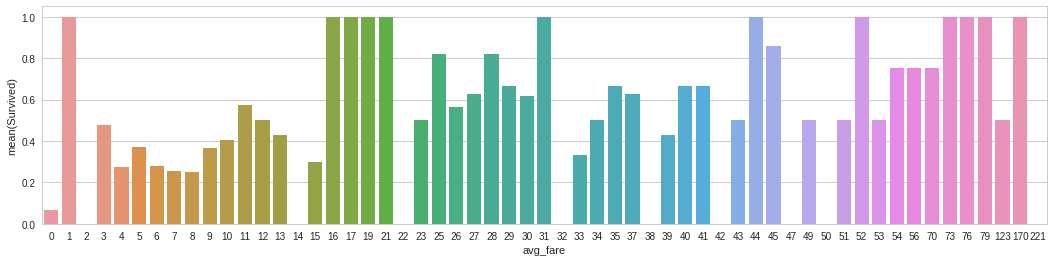

In [171]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'avg_fare',shade= True)
facet.set(xlim=(0, titanic_df['avg_fare'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["avg_fare", "Survived"]].groupby(['avg_fare'],as_index=False).mean()
sns.barplot(x='avg_fare', y='Survived', data=average_age)



In [172]:
def get_rich(passenger):
    avg_fare = passenger
    if avg_fare < 11:
        return 0
    else:
        return 1
titanic_df['Rich'] = titanic_df['avg_fare'].apply(get_rich)
test_df['Rich']    = test_df['avg_fare'].apply(get_rich)


In [173]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")
embark_dummies_titanic = pd.get_dummies(titanic_df['Embarked'])
#embark_dummies_titanic.drop(['S'],axis=1, inplace = True)

embark_dummies_test = pd.get_dummies(test_df['Embarked'])
#embark_dummies_test.drop(['S'],axis=1, inplace = True)


titanic_df = titanic_df.join(embark_dummies_titanic)
test_df = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'],axis=1, inplace = True)
test_df.drop(['Embarked'],axis=1, inplace = True)  

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


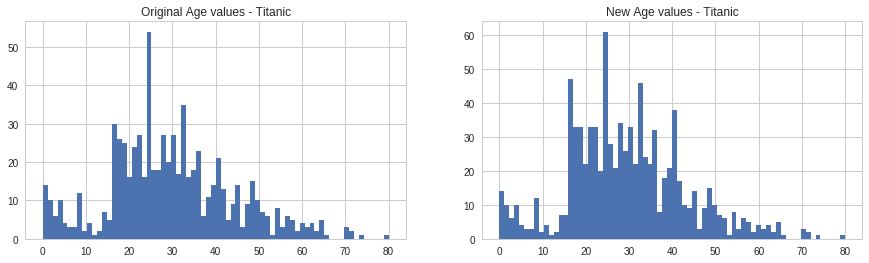

In [174]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

In [175]:
def get_period(passenger):
    age = passenger
    if age < 16:
        return 'child'
    elif age < 48:
        return 'youth'
    else:
        return 'old'

titanic_df['Period'] = titanic_df['Age'].apply(get_period)
test_df['Period']    = test_df['Age'].apply(get_period)

#titanic_df.drop(['Age'],axis=1,inplace=True)
#test_df.drop(['Age'],axis=1,inplace=True)

period_dummies_titanic  = pd.get_dummies(titanic_df['Period'])
period_dummies_titanic.columns = ['child','youth','old']


period_dummies_test  = pd.get_dummies(test_df['Period'])
period_dummies_test.columns = ['child','youth','old']


titanic_df = titanic_df.join(period_dummies_titanic)
test_df    = test_df.join(period_dummies_test)

titanic_df.drop(['Period'], axis=1, inplace=True)
test_df.drop(['Period'], axis=1, inplace=True)

#titanic_df.drop(['youth'], axis=1, inplace=True)
#test_df.drop(['youth'], axis=1, inplace=True)


In [176]:
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [177]:
titanic_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,avg_fare,f_num,max_num,Rich,C,Q,S,child,youth,old,Class_1,Class_2
0,1,0,male,22,1,0,7.2500,3,2,2,0,0,0,1,0,0,1,0,0
1,2,1,female,38,1,0,71.2833,35,2,2,1,1,0,0,0,0,1,1,0
2,3,1,female,26,0,0,7.9250,7,1,1,0,0,0,1,0,0,1,0,0
3,4,1,female,35,1,0,53.1000,26,2,2,1,0,0,1,0,0,1,1,0
4,5,0,male,35,0,0,8.0500,8,1,1,0,0,0,1,0,0,1,0,0


In [178]:



# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Sex'])
person_dummies_titanic.columns = ['Female','Male']


person_dummies_test  = pd.get_dummies(test_df['Sex'])
person_dummies_test.columns = ['Female','Male']


titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

titanic_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)


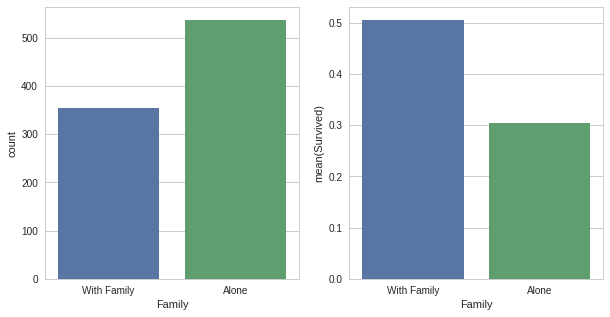

In [179]:
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
#titanic_df = titanic_df.drop(['SibSp','Parch','max_num'], axis=1)
#test_df    = test_df.drop(['SibSp','Parch','max_num'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [180]:
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [181]:
X_train.head()

x_train = X_train.drop("PassengerId",axis=1)

In [182]:
x_train.head()

,Age,SibSp,Parch,Fare,avg_fare,f_num,max_num,Rich,C,Q,S,child,youth,old,Class_1,Class_2,Female,Male,Family
0,22,1,0,7.2500,3,2,2,0,0,0,1,0,0,1,0,0,0,1,1
1,38,1,0,71.2833,35,2,2,1,1,0,0,0,0,1,1,0,1,0,1
2,26,0,0,7.9250,7,1,1,0,0,0,1,0,0,1,0,0,1,0,0
3,35,1,0,53.1000,26,2,2,1,0,0,1,0,0,1,1,0,1,0,1
4,35,0,0,8.0500,8,1,1,0,0,0,1,0,0,1,0,0,0,1,0


In [183]:
logreg = LogisticRegression()

logreg.fit(x_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(x_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [184]:
import xgboost as xgb

In [185]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional     scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
 
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [186]:
train = titanic_df
target = 'Survived'
IDcol = 'PassengerId'

In [187]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds, show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])
 
#Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Survived'],eval_metric='auc')
 
#Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
 
#Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Survived'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Survived'], dtrain_predprob)
 
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')




Model Report
Accuracy : 0.862
AUC Score (Train): 0.924531


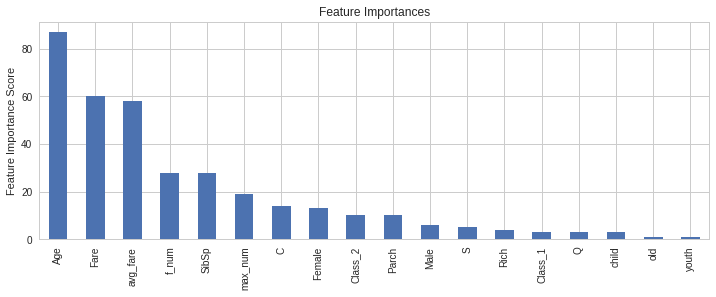

In [188]:

predictors = [x for x in train.columns if x not in [target,IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [189]:
Y_pred = xgb1.predict(X_test)

In [190]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)